In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajusta la ruta según sea necesario
archivo_ETL = r'D:\user\Documents\SANDRA 2023\HENRY\PROYECTO 2\ETL\homicidios_ETL.xlsx'

# Importar el conjunto de datos
df = pd.read_excel(archivo_ETL)

In [2]:
df.head(3)

,ID,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,07:00:00,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [3]:
# Información general

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N_VICTIMAS       696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   HORA             696 non-null    object        
 4   LUGAR_DEL_HECHO  696 non-null    object        
 5   TIPO_DE_CALLE    696 non-null    object        
 6   COMUNA           696 non-null    int64         
 7   pos x            696 non-null    object        
 8   pos y            696 non-null    object        
 9   PARTICIPANTES    696 non-null    object        
 10  VICTIMA          696 non-null    object        
 11  ACUSADO          696 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 65.4+ KB


In [4]:
# Estadísticas descriptivas para columnas numéricas

df.describe()

,N_VICTIMAS,FECHA,COMUNA
count,696.000000,696,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,7.425287
min,1.000000,2016-01-01 00:00:00,0.000000
25%,1.000000,2017-04-02 12:00:00,4.000000
50%,1.000000,2018-07-12 12:00:00,8.000000
75%,1.000000,2020-01-04 06:00:00,11.000000
max,3.000000,2021-12-30 00:00:00,15.000000
std,0.179393,NaN,4.387050


Count (Conteo): Hay un total de 696 eventos de siniestros viales.
Mean (Media): La media es aproximadamente 1.03, lo que indica que, en promedio, cada evento involucra alrededor de una víctima.
Min (Mínimo): El evento con la menor cantidad de víctimas tiene 1 víctima.
25% (Percentil 25): El 25% de los eventos tienen al menos 1 víctima. (Igual que para el 50% y el 75%)
Max (Máximo): El evento con la mayor cantidad de víctimas tiene 3 víctimas.
Std (Desviación Estándar): La desviación estándar es baja (0.18), lo que sugiere que la cantidad de víctimas tiende a variar poco entre los eventos.

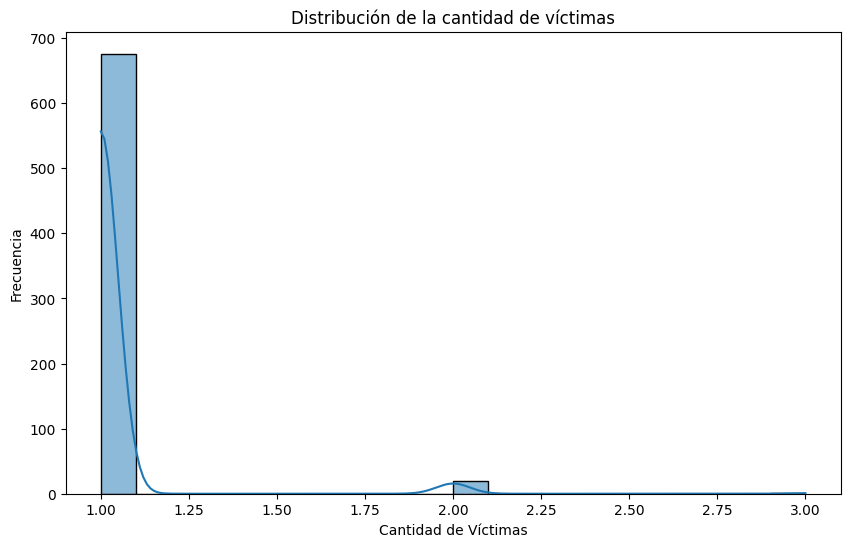

In [5]:
# Exploración de la distribución de la cantidad de víctimas

plt.figure(figsize=(10, 6))
sns.histplot(df['N_VICTIMAS'], bins=20, kde=True)
plt.title('Distribución de la cantidad de víctimas')
plt.xlabel('Cantidad de Víctimas')
plt.ylabel('Frecuencia')
plt.show()

Como mostraba la estadistica descriptiva la mayoria de los evento tiene una victima, dos victimas muy pocas y 3 victimas solo 1

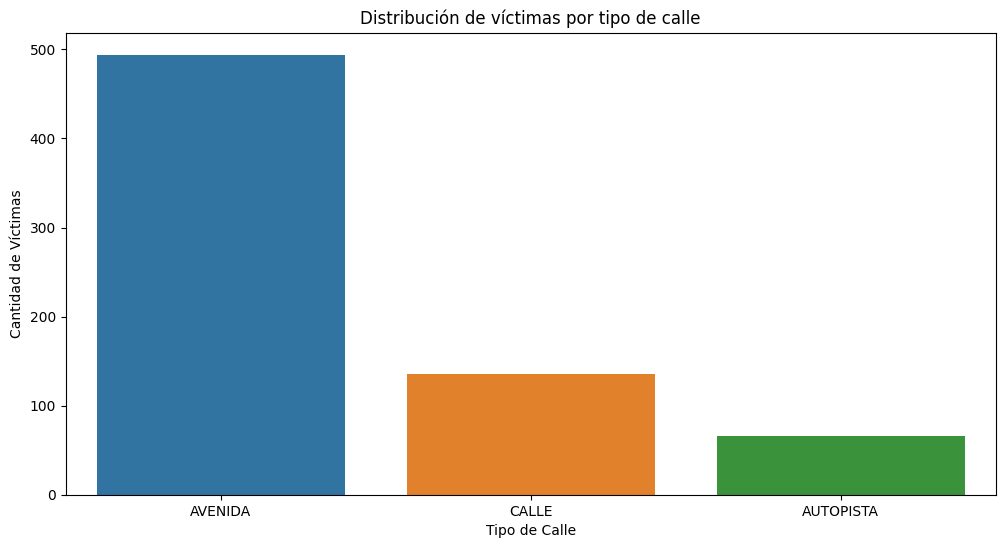

In [6]:
# Visualización de la distribución de víctimas por tipo de calle
plt.figure(figsize=(12, 6))
sns.countplot(x='TIPO_DE_CALLE', data=df)
plt.title('Distribución de víctimas por tipo de calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Víctimas')
plt.show()

Con esta distribucion encontramos que la gran mayoria de siniestros ocurren en Avenida y en menor proporcion en Calle y Autopista, seguramente la velocidad que se alcanza en las Avenidas influye en este resultado

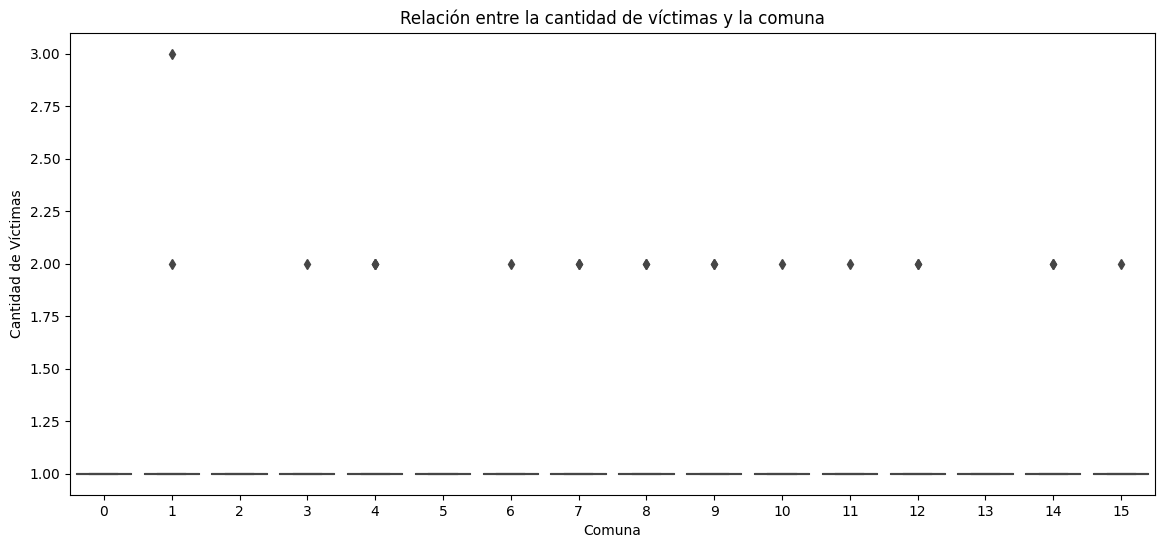

In [7]:
# Visualización de la relación entre la cantidad de víctimas y la comuna

plt.figure(figsize=(14, 6))
sns.boxplot(x='COMUNA', y='N_VICTIMAS', data=df)
plt.title('Relación entre la cantidad de víctimas y la comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.show()

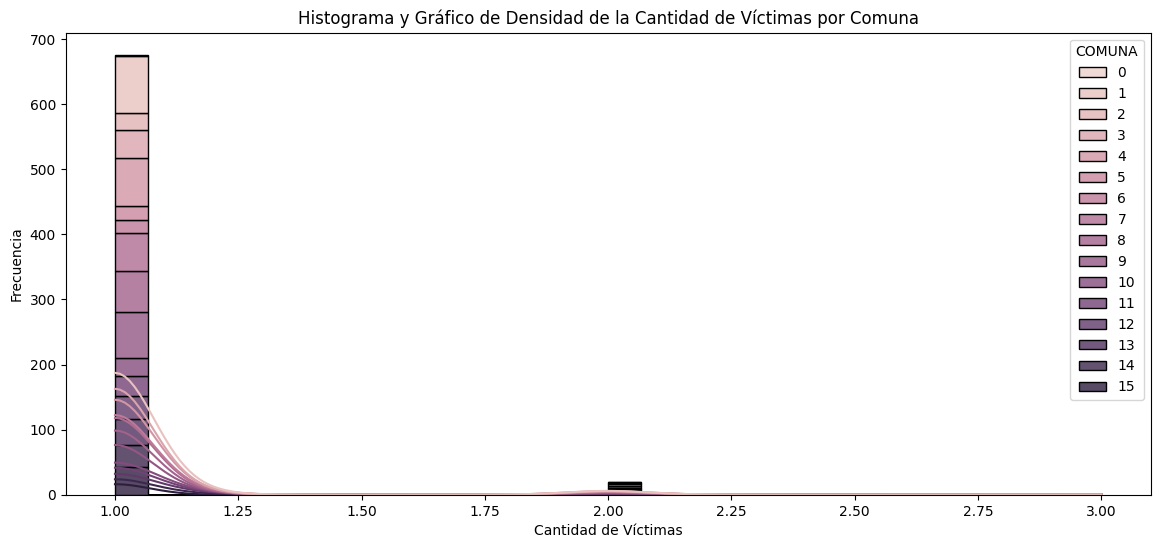

In [8]:
# Visualización de histograma y gráfico de densidad para la cantidad de víctimas por comuna
plt.figure(figsize=(14, 6))
sns.histplot(df, x='N_VICTIMAS', hue='COMUNA', multiple='stack', kde=True, bins=30, alpha=0.8)  
plt.title('Histograma y Gráfico de Densidad de la Cantidad de Víctimas por Comuna')
plt.xlabel('Cantidad de Víctimas')
plt.ylabel('Frecuencia')
plt.show()

Se realiza Boxplot para la relacion de victimas por comuna sin embargo la variabilidad es muy limitada o pequeña como se vio en la distribucion de victimas por lo que las cajas se ven como lineas. En el grafico de densidad se ratifica que practicamente todas las comunas han tenido una victima al menos.

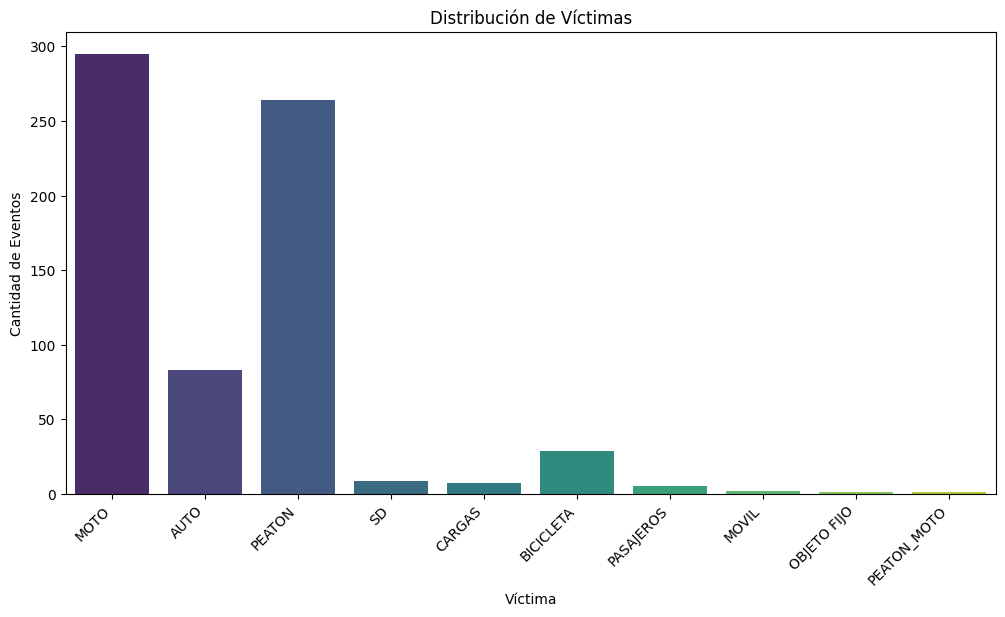

In [9]:
# Distribución de Víctimas
plt.figure(figsize=(12, 6))
sns.countplot(x='VICTIMA', data=df, palette='viridis')
plt.title('Distribución de Víctimas')
plt.xlabel('Víctima')
plt.ylabel('Cantidad de Eventos')
plt.xticks(rotation=45, ha='right')
plt.show()

Otro grafico que puede interesar es el de Distribucion de las victimas, aca en su mayoria se ven que son moto y peatones.

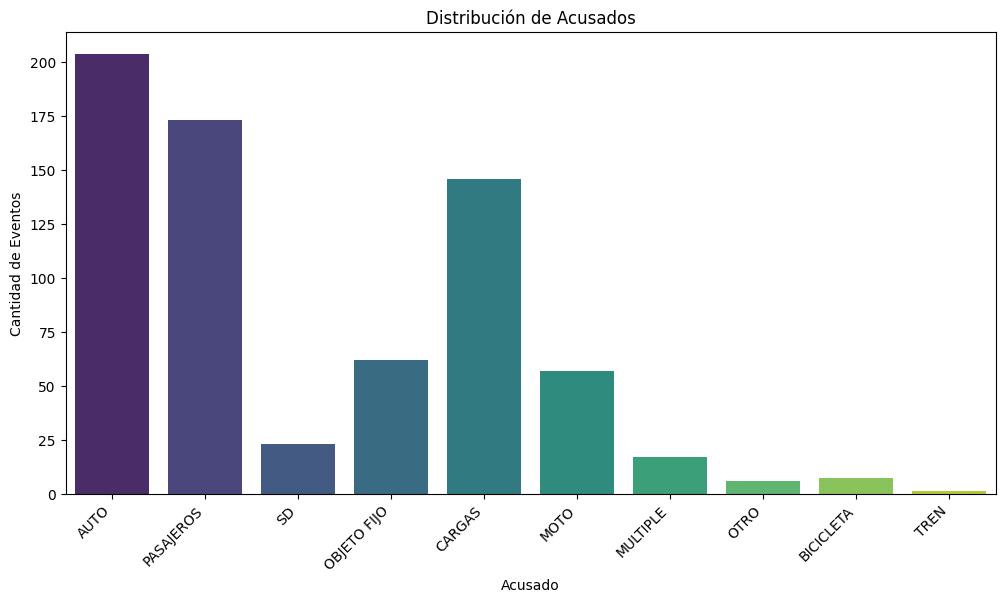

In [10]:
# Distribución de Acusados
plt.figure(figsize=(12, 6))
sns.countplot(x='ACUSADO', data=df, palette='viridis')
plt.title('Distribución de Acusados')
plt.xlabel('Acusado')
plt.ylabel('Cantidad de Eventos')
plt.xticks(rotation=45, ha='right')
plt.show()

En esta grafica se muestra que la mayoria de los accidentes son ocasionados por Autos sin embargo le sigue de cerca los pasajeros lo que hace intuir que la imprudencia de los pasajeros a la hora de abordar o abandonar un vehiculo tambien generan gran cantidad de siniestros.

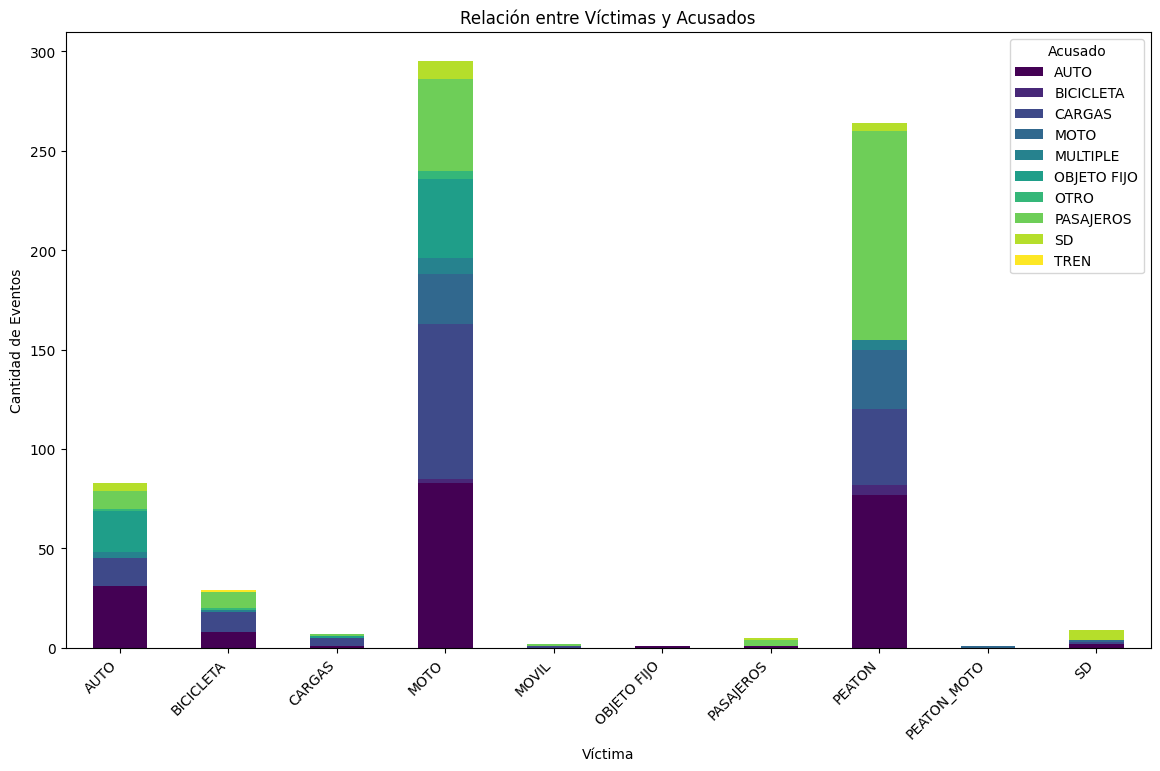

In [11]:
#Relacion victimas y acusados

# Crear una tabla de contingencia
cross_tab = pd.crosstab(df['VICTIMA'], df['ACUSADO'])

# Gráfico de barras apiladas
cross_tab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Relación entre Víctimas y Acusados')
plt.xlabel('Víctima')
plt.ylabel('Cantidad de Eventos')
plt.legend(title='Acusado')
plt.xticks(rotation=45, ha='right')
plt.show()

Esta es una grafica interesante donde se puede revisar visualmente la relacion que hay entre las victimas y los acusados, por ejemplo una  vez mas se ve la tendencia de culpabilidad del siniestro a los autos (color morado)

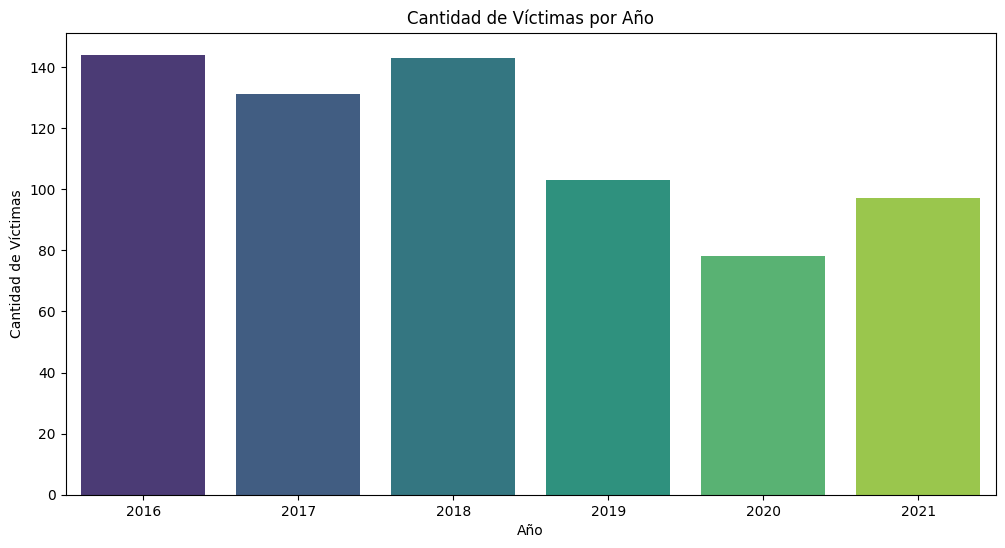

In [12]:
# Sniestros por año

# Extraer el año de la columna 'FECHA'
df['AÑO'] = pd.to_datetime(df['FECHA']).dt.year

# Crear un gráfico de barras agrupado por año
plt.figure(figsize=(12, 6))
sns.countplot(x='AÑO', data=df, palette='viridis')
plt.title('Cantidad de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.show()

Con este grafico vemos que la mayor cantidad de siniestros ocurrieron en los años 2016 y 2018, mientras que la año que menos siniestros tuvo fue el año 2020.

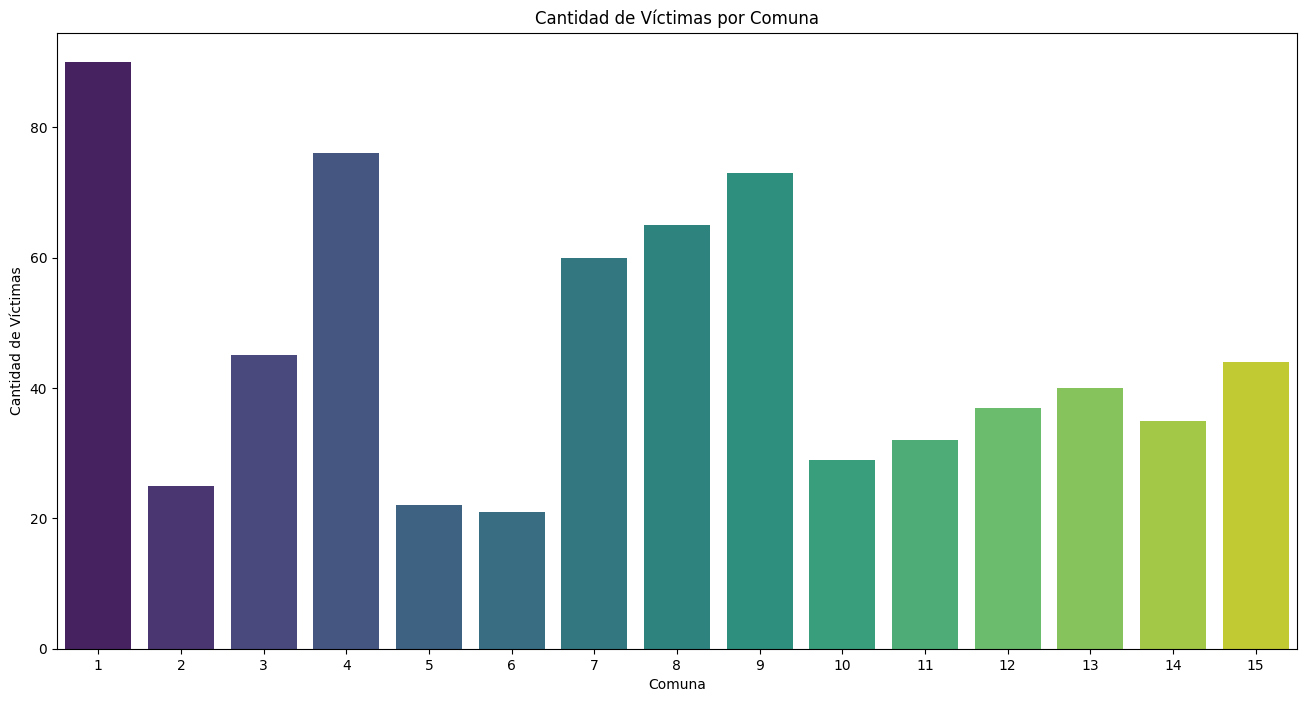

In [13]:
# Crear un gráfico de barras agrupado por comuna

# Filtrar los datos para excluir la Comuna 0
df_sin_comuna_cero = df[df['COMUNA'] != 0]

# Crear un gráfico de barras agrupado por comuna
plt.figure(figsize=(16, 8))
sns.countplot(x='COMUNA', data=df_sin_comuna_cero, palette='viridis')
plt.title('Cantidad de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.show()

Encontramos que la data traia informacion de comuna 0 pero esta no existe por tanto se elimino de este grafico. Apreciamos que la mayor accidentalidad corresponde a la comuna 1, seguido de la 4 y la 9 por lo que seria un dato importante de analisis para saber que sucede en estas comunas.

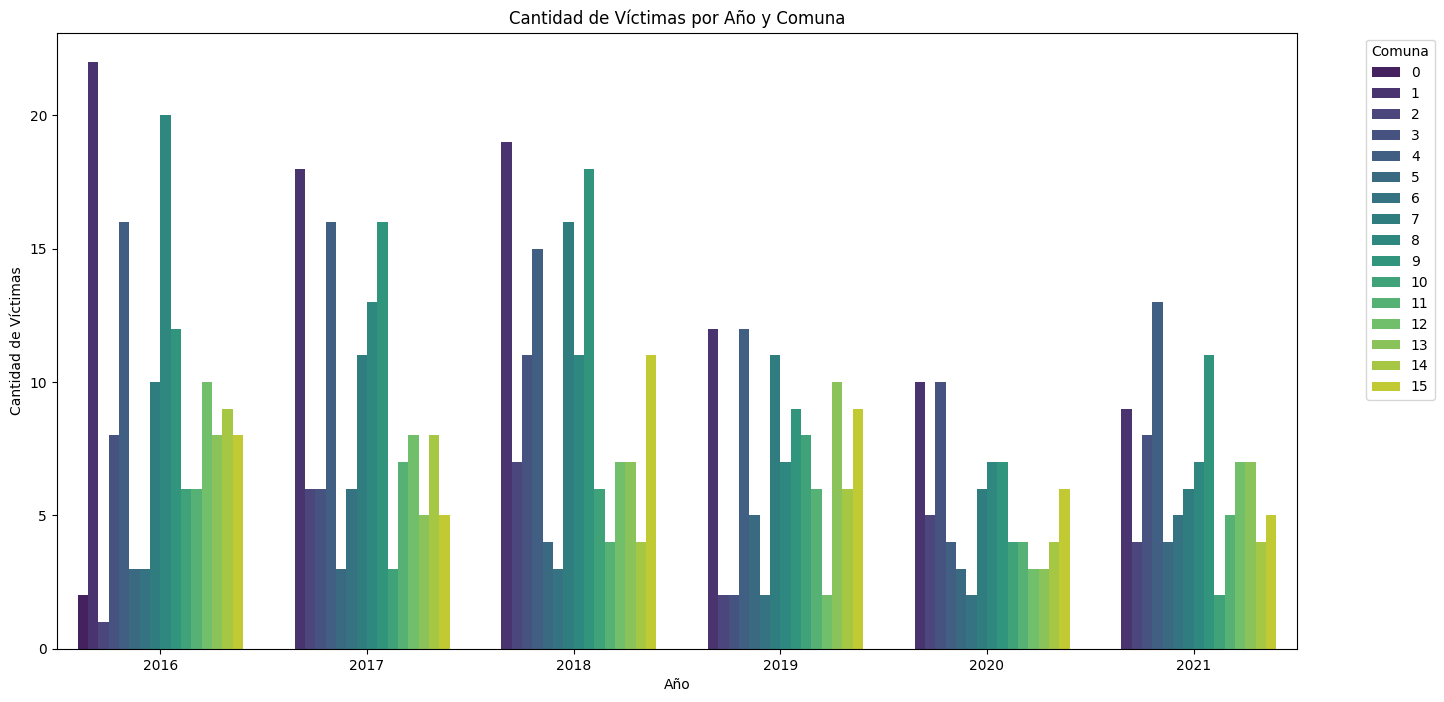

In [14]:
# Crear un gráfico de barras agrupado por año y comuna
plt.figure(figsize=(16, 8))
sns.countplot(x='AÑO', hue='COMUNA', data=df, palette='viridis')
plt.title('Cantidad de Víctimas por Año y Comuna')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.legend(title='Comuna', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Se realiza un grafico combinado de victimas por año y comuna.

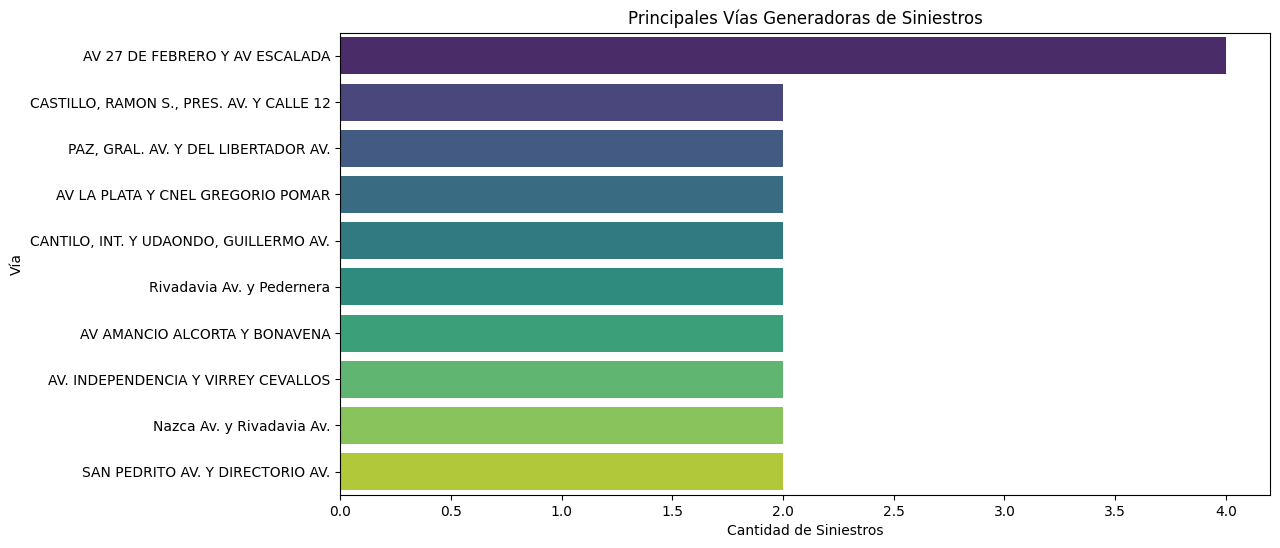

In [15]:
# Obtener las principales vías y su frecuencia
principales_vias = df['LUGAR_DEL_HECHO'].value_counts().head(10)

# Crear un gráfico de barras para visualizar las principales vías
plt.figure(figsize=(12, 6))
sns.barplot(x=principales_vias.values, y=principales_vias.index, palette='viridis')
plt.title('Principales Vías Generadoras de Siniestros')
plt.xlabel('Cantidad de Siniestros')
plt.ylabel('Vía')
plt.show()

La ubicacion donde hay mas siniestros es en la Av 27 de Febrero con Av. Escalada

C:\Users\SANDRA\AppData\Local\Temp\ipykernel_12752\3685043244.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['HORA'] = pd.to_datetime(df['HORA'], errors='coerce').dt.hour


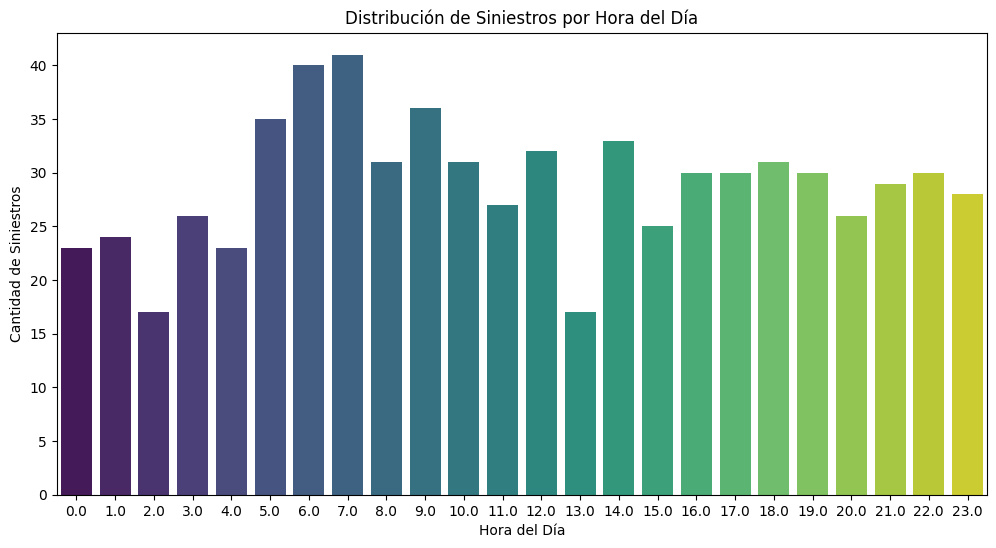

In [16]:
# Convertir la columna 'HORA' a formato de tiempo
df['HORA'] = pd.to_datetime(df['HORA'], errors='coerce').dt.hour

# Crear un gráfico de barras para visualizar la distribución de siniestros por hora
plt.figure(figsize=(12, 6))
sns.countplot(x=df['HORA'], palette='viridis')
plt.title('Distribución de Siniestros por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Siniestros')
plt.show()

La hora en que mas se presentan los sinestros son entre las 6 y las 7 am

In [17]:

 # Importar el conjunto de datos
df1 = pd.read_excel('../homicidios.xlsx', sheet_name= "VICTIMAS")

In [18]:
df1

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [23]:
df= df.rename(columns={"ID":"Id_hecho"})

In [24]:
df1= df1.rename(columns={"ID_hecho":"Id_hecho"})

In [25]:
print(df.columns)
print(df1.columns)

Index(['Id_hecho', 'N_VICTIMAS', 'FECHA', 'HORA', 'LUGAR_DEL_HECHO',
       'TIPO_DE_CALLE', 'COMUNA', 'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA',
       'ACUSADO', 'AÑO'],
      dtype='object')
Index(['Id_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')


In [26]:
homicidios = pd.merge(df,df1,on ="Id_hecho", how="left")

In [27]:
homicidios.to_csv("../homicidios.csv")